# Importing Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
import seaborn as sns

# Reading The Data

In [3]:
job_salaries_df = pd.read_csv('ds_salaries.csv')
display(job_salaries_df)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [4]:
job_salaries_df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

# Preparing The Data

At this stage of the analysis process, it is important to check for irrelevant variables. <br>
The column <em>Unnamed: 0</em>, in this case, is equal to the index and has no relevance for analysis, being removed from the data frame. Note that the type of non-numeric data is presented as <em>type: objects</em>. <br>
In order to make the graphical representations for analysis, it was preferable to change their type to "category".


In [5]:
job_salaries_df = job_salaries_df.drop('Unnamed: 0', axis = 1)

In [6]:
display(job_salaries_df)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [7]:
job_salaries_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [8]:
job_salaries_df[['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']] = job_salaries_df[['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']].astype('category')

In [9]:
job_salaries_df['salary_in_usd'] = job_salaries_df['salary_in_usd'].astype('float64')

In [10]:
job_salaries_df.dtypes

work_year                int64
experience_level      category
employment_type       category
job_title             category
salary                   int64
salary_currency       category
salary_in_usd          float64
employee_residence    category
remote_ratio             int64
company_location      category
company_size          category
dtype: object

# Missing Values

During data analysis, it may happen that there is no data stored within a variable. This can generate empty values that can interfere with the statistical results. In this case, note that there are no <strong>missing values</strong> in this data frame.


In [11]:
job_salaries_df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Outliers

<strong>Outliers</strong>, in the context of data analysis, are data that present a lot of discrepancy when compared to the rest of the data. In this analysis, the existence of outliers was not verified.

In [57]:
df_outliers = job_salaries_df[['work_year','salary','salary_in_usd', 'remote_ratio']]

array([[<AxesSubplot:title={'center':'work_year'}>,
        <AxesSubplot:title={'center':'salary'}>],
       [<AxesSubplot:title={'center':'salary_in_usd'}>,
        <AxesSubplot:title={'center':'remote_ratio'}>]], dtype=object)

<Figure size 1280x640 with 0 Axes>

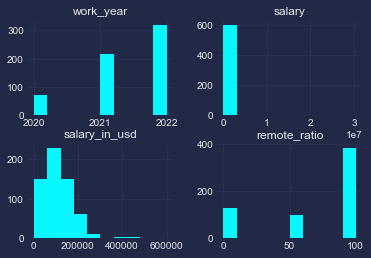

In [61]:
df_outliers.hist()

# Data Analysis


Initially, at this point in the analysis, 3 data frames were created, separated by the years of work: 2020, 2021 and 2022. Note that there are values within the <strong><em>job_title</em></strong> variable that are not repeated in every year.<br> 
For each year, a chart was generated with the 5 highest salaries in dollars in the area of data science.

It is concluded from the analysis of these graphs that in 2020 the <strong>most relevant professions</strong> were linked to the area of data science. <br>
In 2021, it is noted that professions linked to the area of machine learning had a significant increase, as well as the salary of professionals linked to the area of ​​​​financial data analysis. <br>
In 2022, more recently, it can be seen that professions linked to data science are in evidence again, but with a higher remuneration for Data Analytics Lead professionals.

In [14]:
df_2020 = job_salaries_df.loc[job_salaries_df['work_year'] == 2020]
display(df_2020)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833.0,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000.0,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024.0,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000.0,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000.0,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
67,2020,SE,FT,Data Science Manager,190200,USD,190200.0,US,100,US,M
68,2020,EN,FT,Data Scientist,105000,USD,105000.0,US,100,US,S
69,2020,SE,FT,Data Scientist,80000,EUR,91237.0,AT,0,AT,S
70,2020,MI,FT,Data Scientist,55000,EUR,62726.0,FR,50,LU,S


In [15]:
df_2021 = job_salaries_df.loc[job_salaries_df['work_year'] == 2021]
display(df_2021)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
72,2021,EN,FT,Research Scientist,60000,GBP,82528.0,GB,50,GB,L
73,2021,EX,FT,BI Data Analyst,150000,USD,150000.0,IN,100,US,L
74,2021,EX,FT,Head of Data,235000,USD,235000.0,US,100,US,L
75,2021,SE,FT,Data Scientist,45000,EUR,53192.0,FR,50,FR,L
76,2021,MI,FT,BI Data Analyst,100000,USD,100000.0,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
284,2021,MI,FT,Research Scientist,69999,USD,69999.0,CZ,50,CZ,L
285,2021,SE,FT,Data Science Manager,7000000,INR,94665.0,IN,50,IN,L
286,2021,SE,FT,Head of Data,87000,EUR,102839.0,SI,100,SI,L
287,2021,MI,FT,Data Scientist,109000,USD,109000.0,US,50,US,L


In [16]:
df_2022 = job_salaries_df.loc[job_salaries_df['work_year'] == 2022]
display(df_2022)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
289,2022,SE,FT,Data Engineer,135000,USD,135000.0,US,100,US,M
290,2022,SE,FT,Data Analyst,155000,USD,155000.0,US,100,US,M
291,2022,SE,FT,Data Analyst,120600,USD,120600.0,US,100,US,M
292,2022,MI,FT,Data Scientist,130000,USD,130000.0,US,0,US,M
293,2022,MI,FT,Data Scientist,90000,USD,90000.0,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000.0,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000.0,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000.0,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000.0,US,100,US,M


In [17]:
df_2020 = df_2020[['salary_in_usd', 'job_title']].groupby('job_title', dropna=True).mean().reset_index().sort_values('salary_in_usd', ascending=False)
df_2021 = df_2021[['salary_in_usd', 'job_title']].groupby('job_title', dropna=True).mean().reset_index().sort_values('salary_in_usd', ascending=False)
df_2022 = df_2022[['salary_in_usd', 'job_title']].groupby('job_title', dropna=True).mean().reset_index().sort_values('salary_in_usd', ascending=False)

In [18]:
df_top_2020 = df_2020.head(5)
df_top_2021 = df_2021.head(5)
df_top_2022 = df_2022.head(5)

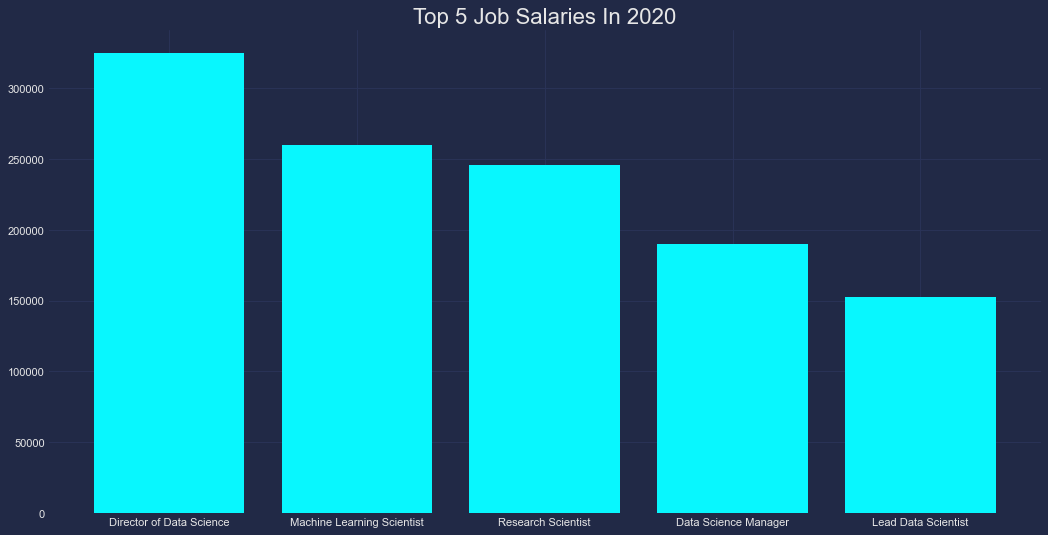

In [64]:
plt.style.use('cyberpunk')
plt.figure(figsize=(16, 8), dpi=80)
x = df_top_2020['job_title']
y = df_top_2020['salary_in_usd']
plt.bar(x, y)
plt.title('Top 5 Job Salaries In 2020',fontsize=20)
plt.show()

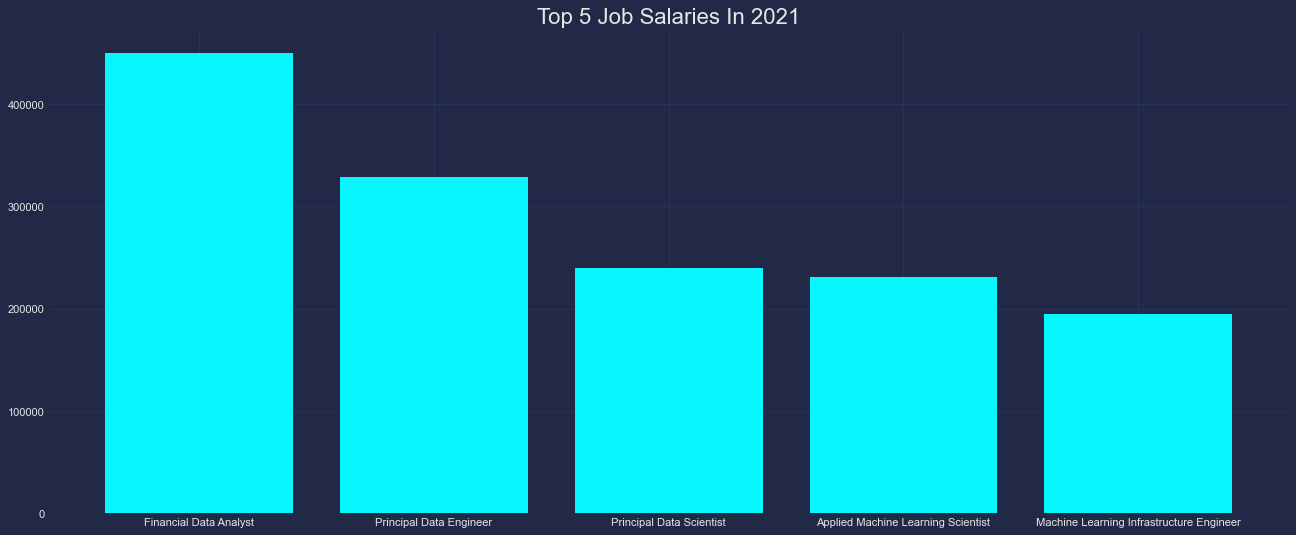

In [63]:
plt.style.use('cyberpunk')
plt.figure(figsize=(20, 8), dpi=80)
x = df_top_2021['job_title']
y = df_top_2021['salary_in_usd']
plt.bar(x, y)
plt.title('Top 5 Job Salaries In 2021',fontsize=20)
plt.show()

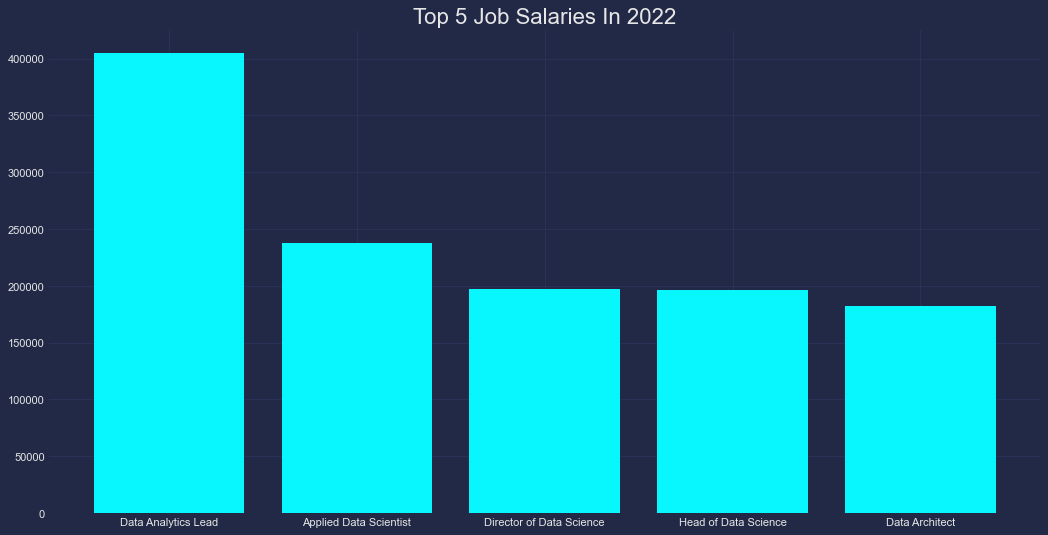

In [62]:
plt.style.use('cyberpunk')
plt.figure(figsize=(16, 8), dpi=80)
x = df_top_2022['job_title']
y = df_top_2022['salary_in_usd']
plt.bar(x, y)
plt.title('Top 5 Job Salaries In 2022',fontsize=20)
plt.show()

From the location of the companies and the average salaries paid over these 3 years, it was also possible to recognize which countries most valued professionals in the area of science and data analysis. After checking the generated graph, it is noted that Russia has the best remuneration for professionals in this area, followed by the United States and New Zealand.

In [22]:
job_salaries_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833.0,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000.0,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024.0,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000.0,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000.0,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000.0,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000.0,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000.0,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000.0,US,100,US,M


In [50]:
job_salaries_df['company_location'].nunique()

50

In [24]:
salaries_location = job_salaries_df[['salary_in_usd', 'company_location']].groupby('company_location', dropna=True).mean().reset_index().sort_values('salary_in_usd', ascending=False)


In [25]:
top_location = salaries_location.head(5)

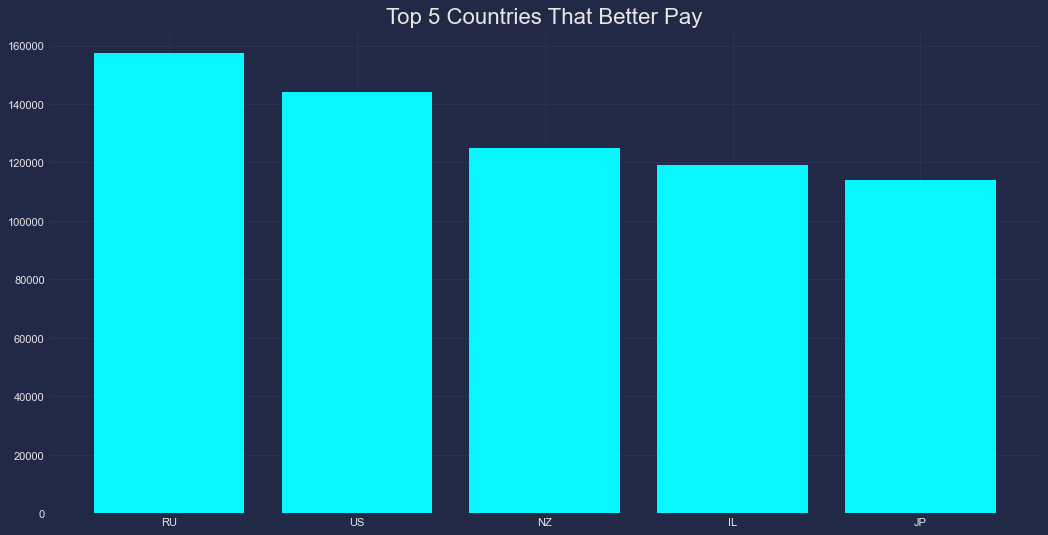

In [65]:
plt.style.use('cyberpunk')
plt.figure(figsize=(16, 8), dpi=80)
x = top_location['company_location']
y = top_location['salary_in_usd']
plt.bar(x, y)
plt.title('Top 5 Countries That Better Pay',fontsize=20)
plt.show()

To finish this analysis, it was possible to observe the number of employees linked to the area of ​​science and data analysis who are working remotely and the average of salaries for each modality. It is concluded that those who work remotely are better paid than those who work in person or in a hybrid way. The number of professionals who work in person is more than half of hybrid and remote professionals.

In [27]:
salary_remote = job_salaries_df

In [28]:
salary_remote = salary_remote[['salary_in_usd', 'remote_ratio']].groupby('remote_ratio').mean().reset_index().sort_values('salary_in_usd', ascending=False)
display(salary_remote)

,remote_ratio,salary_in_usd
2,100,122457.454068
0,0,106354.622047
1,50,80823.030303


In [29]:
salary_remote['remote_ratio'] = salary_remote['remote_ratio'].astype('category')

In [32]:
job_salaries_df['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

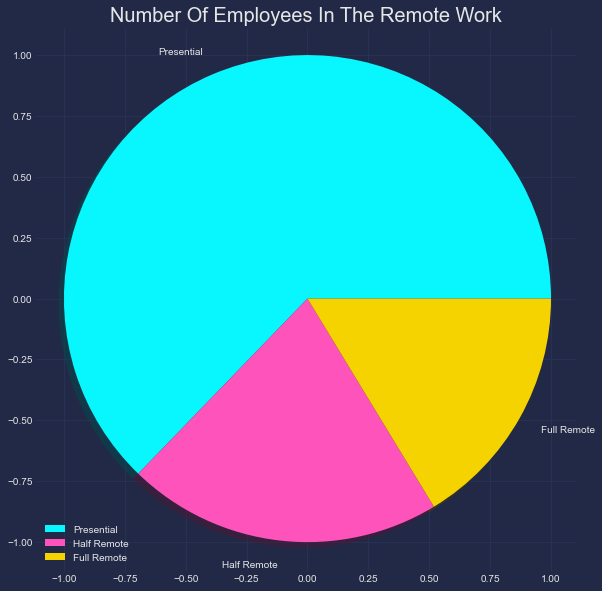

In [66]:
remote = np.array(job_salaries_df['remote_ratio'].value_counts(sort=True))

labels = ['Presential', 'Half Remote', 'Full Remote']

plt.style.use('cyberpunk')
plt.figure(figsize=(10,10))
plt.pie(remote, labels=labels, shadow=True, frame=True)
plt.legend()
plt.title('Number Of Employees In The Remote Work',fontsize=20)
plt.show()